# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [100]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [101]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(3, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

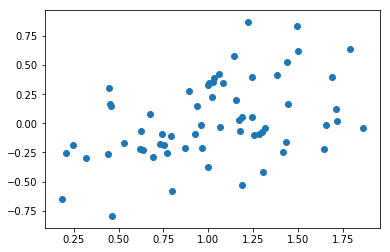

In [102]:
plt.scatter(x.T[0], y)

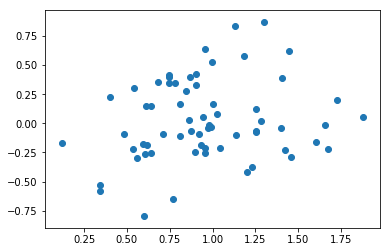

In [103]:
plt.scatter(x.T[1], y)

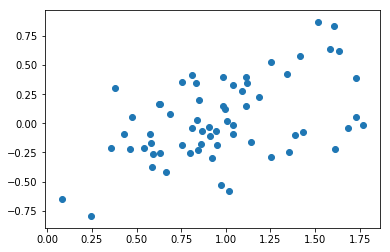

In [104]:
plt.scatter(x.T[2], y)

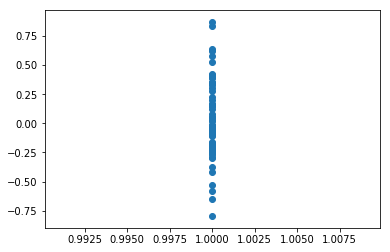

In [105]:
plt.scatter(x.T[3], y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [106]:
beta = np.linalg.lstsq(x, y)[0]
beta

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 0.21360922, -0.12049158,  0.36086706, -0.42907357])

In [107]:
pred = np.dot(x, beta)
pred

array([-0.14246364, -0.45403086, -0.1202048 ,  0.0672013 , -0.14560078,
       -0.19444604, -0.16088493, -0.02797341, -0.09634872, -0.21134769,
       -0.3128319 , -0.03480422,  0.13351606, -0.16246676, -0.24050011,
       -0.19471693, -0.06933171, -0.11865468, -0.00611734, -0.00644366,
       -0.15198579, -0.20491522,  0.05209379, -0.26334009,  0.05282377,
        0.16976357,  0.11507049, -0.01918252, -0.00674582, -0.00358117,
       -0.11459395,  0.00653455,  0.17154298,  0.06989738, -0.05443319,
       -0.15999941,  0.25458496, -0.02418935, -0.01300513, -0.08849727,
        0.10189675, -0.00652936,  0.01996417,  0.01240821,  0.202853  ,
        0.30229093,  0.21465036,  0.18311278,  0.30831508,  0.18135019,
        0.09555376,  0.22903812, -0.08503804,  0.05089671,  0.21071275,
        0.40915975,  0.21375707,  0.45983145,  0.24594955,  0.14678894,
        0.33384648,  0.1456097 ,  0.23337967,  0.22226751])

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

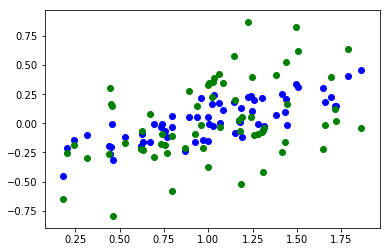

In [108]:
plt.scatter(x.T[0], pred, c='b')
plt.scatter(x.T[0], y, c='green')

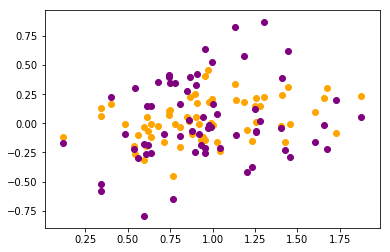

In [109]:
plt.scatter(x.T[1], pred, c='orange')
plt.scatter(x.T[1], y, c='purple')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [110]:
import pandas as pd
credit = pd.read_csv('Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [111]:
X = credit[['Income', 'Limit','Cards','Age','Education']].as_matrix()

X = np.vstack([X.T, np.ones(len(X))]).T
X

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1.48910e+01, 3.60600e+03, 2.00000e+00, 3.40000e+01, 1.10000e+01,
        1.00000e+00],
       [1.06025e+02, 6.64500e+03, 3.00000e+00, 8.20000e+01, 1.50000e+01,
        1.00000e+00],
       [1.04593e+02, 7.07500e+03, 4.00000e+00, 7.10000e+01, 1.10000e+01,
        1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 5.00000e+00, 6.70000e+01, 1.20000e+01,
        1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00, 4.40000e+01, 1.30000e+01,
        1.00000e+00],
       [1.87010e+01, 5.52400e+03, 5.00000e+00, 6.40000e+01, 7.00000e+00,
        1.00000e+00]])

In [112]:
y = credit['Rating']

In [113]:
beta = np.linalg.lstsq(X, y)[0]
beta

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 3.35485393e-02,  6.63804553e-02,  4.85381863e+00,  7.78467717e-04,
       -2.18197621e-01,  2.76079424e+01])

In [114]:
pred = np.dot(X, beta)
pred

array([274.80936683, 483.61537767, 517.82897792, 675.67327914,
       360.8172026 , 581.75462841, 260.32737919, 510.04572085,
       268.65476949, 493.08787811, 584.91870502, 126.25757295,
       386.03075611, 491.48710623, 253.63772728, 207.22541286,
       286.85201246, 330.78816903, 455.95560725, 476.63463944,
       234.02300975, 453.43596588, 215.35631278, 396.10121136,
       155.93164499, 335.84074249, 296.20072579, 335.92781187,
       930.98145563, 416.93514238, 423.22589075, 230.80806034,
       559.30796223, 167.32676451, 210.59896243, 210.1737348 ,
       465.68314188, 466.62393715, 304.07380263, 274.20563091,
       261.17696508, 546.31499478, 352.18193444, 446.00710037,
       462.94199059, 544.61960236, 369.28611225, 329.71036577,
       204.49637295, 348.97574997, 384.20437069, 297.7687177 ,
       392.527371  , 408.27516363, 135.40709128, 155.27648362,
       374.41035522, 363.81009424, 265.01205885, 396.53527344,
       379.21578888, 245.79508196, 147.7992154 , 242.85

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

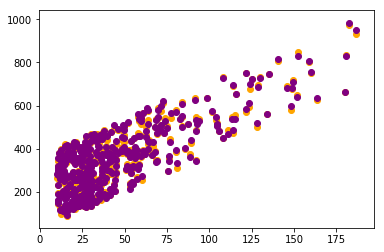

In [115]:
plt.scatter(X.T[0], pred, c='orange')
plt.scatter(X.T[0], y, c='purple')

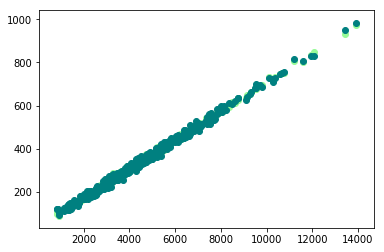

In [124]:
plt.scatter(X.T[1], pred, c='palegreen')
plt.scatter(X.T[1], y, c='teal')

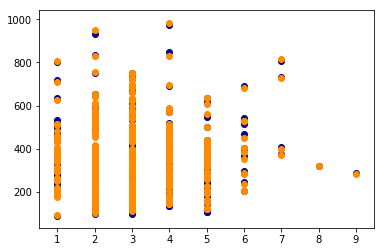

In [138]:
plt.scatter(X.T[2], pred, c='darkblue')
plt.scatter(X.T[2], y, c='darkorange')

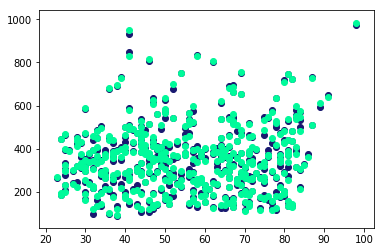

In [122]:
plt.scatter(X.T[3], pred, c='midnightblue')
plt.scatter(X.T[3], y, c='mediumspringgreen')

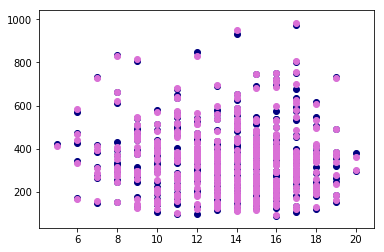

In [137]:
plt.scatter(X.T[4], pred, c='navy')
plt.scatter(X.T[4], y, c='orchid')

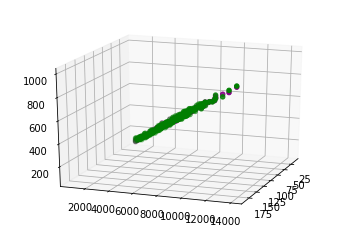

In [149]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.scatter(X.T[0], X.T[1], pred, zdir='z', c='purple')
ax.scatter(X.T[0], X.T[1], y, zdir='z', c='green')